In [256]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

In [298]:
class delicious_stacked_plot():
    
    """ Delicious_plot class for creating stacked bar plot, 
    for visualizing relationship between categorical variables, feature categorical variables, 
    target categorical variables。
    
    Attributes:
    feature_x (string) representing categorical x variables
    target_y (string) representing categorical y variables
    plot_tile (string) representing the customized title of plot
    data (pandas dataframe) representing dataframe passed to plot
    
    """
    
    
    def __init__(self, feature_x, target_y, plot_title, data):
        
        self.feature_x = feature_x
        self.target_y = target_y
        self.title = plot_title
        self.df = pd.DataFrame(data = data)
        
        
    def data_preparation(self):
        
        """ Method to prepare the dataset ready for stacked_plot by using pandas
        
        Args: 
            None
        
        Returns:
            dataframe with calculated proportion of target y in each feature x
        
        """
        # pass attributes
        df = self.df
        cat_x = self.feature_x
        cat_y = self.target_y
        
        # aggregate data
        data = df.groupby([cat_x, cat_y])[cat_x].count()
        
        # calculate percent and swap index level
        perc_df = pd.DataFrame(data.div(data.sum()).T).swaplevel().unstack()
  
        return perc_df
        

    def plot_visualization(self, annotate = True):
        
        """ Method to visualize data as stacked plot by using matplotlib pyplot library
        
        Args:
            annotate: binary
            
        Returns:
            None
        """
        
        # pass prepared dataset
        prepared_df = self.data_preparation()
        
        # create figure object
        fig, ax = plt.subplots(figsize = (8, 5))
        
        # stacked plot
        prepared_df.plot(kind = 'bar', stacked = True, color = ['yellow', 'orange', 'red'], ax = ax)
        
        # set legend
        ax.legend(title = self.feature_x,  framealpha = 1,
                  bbox_to_anchor = (1, 0.5), loc = 6)
        
        # set y label
        ax.set_ylabel('Proportion')
        
        # pass title attributes to title
        fig.suptitle(self.title)
        
        # foremat y ticks 
        y_values = ['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
        ax.set_yticklabels(y_values)

        # annotate by using ax patches
        while annotate:
            for patch in ax.patches:
                width, height = patch.get_width(), patch.get_height()
                x, y = patch.get_xy()
                ax.text(x+width/2, y+height/2,
                   '{:.2f} %'.format(height), 
                    horizontalalignment='center',
                    verticalalignment='center')
        
        
        def __repr__(self):
            
            return print(pd.DataFrame(self.data_preparation()))

In [246]:
tips.groupby(['sex', 'time'])['sex'].count()

sex     time  
Male    Lunch      33
        Dinner    124
Female  Lunch      35
        Dinner     52
Name: sex, dtype: int64

In [300]:
tips_trial = delicious_plot('sex', 'time', 'trial_plot', tips)

In [301]:
tips_trial

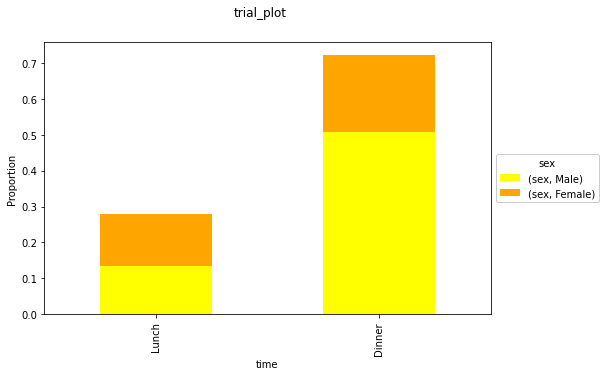

In [269]:
tips_trial.plot_visualization(annotate = True)

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
tipstips['sex'].value_counts()/tips.shape[0]

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

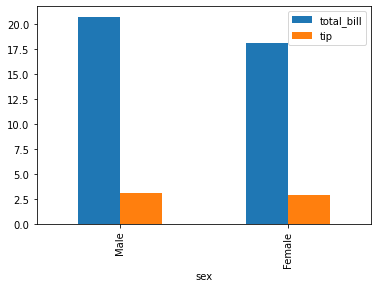

In [43]:
ax = tips.groupby(['sex'])[['total_bill', 'tip']].mean().plot(kind = 'bar')

In [100]:
df = tips.groupby(['sex', 'time'])['sex'].count()

In [93]:
df

sex     time  
Male    Lunch      33
        Dinner    124
Female  Lunch      35
        Dinner     52
Name: sex, dtype: int64

In [91]:
df.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, name='sex', dtype='category')

In [101]:
perc_df = pd.DataFrame(df.div(df.sum()).T)

In [104]:
df2 = perc_df.swaplevel()

In [103]:
perc_df

sex
sex    time            
Male   Lunch   0.135246
       Dinner  0.508197
Female Lunch   0.143443
       Dinner  0.213115

In [105]:
df2.rename(columns={'sex':'perc'}, inplace = True)

In [108]:
df2 = df2.unstack()

<ipython-input-293-6a938f9c7b07>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_values)


Text(0, 0.5, 'Proportion')

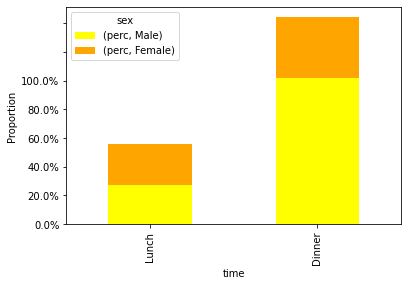

In [293]:
fig, ax = plt.subplots()
y_values = ['{:.1%}'.format(label) for label in ax.get_yticks()]
ax.set_yticklabels(y_values)
df2.plot(kind = 'bar', stacked = True, color = ['yellow', 'orange', 'red'], ax = ax)
ax.legend(title = x)
ax.set_ylabel('Proportion')

In [288]:
['{:.1%}'.format(a) for a in ax.get_yticks()]

['0.0%',
 '10.0%',
 '20.0%',
 '30.0%',
 '40.0%',
 '50.0%',
 '60.0%',
 '70.0%',
 '80.0%']

In [116]:
ax.patches

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [112]:
list(df2.index)

['Lunch', 'Dinner']

TypeError: Can only swap levels on a hierarchical axis.

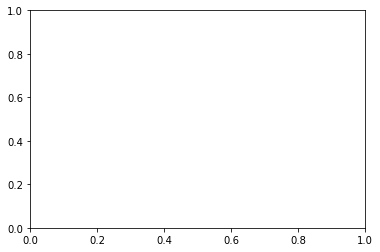

In [68]:
fig, ax = plt.subplots()
perc_df = perc_df.swaplevel().unstack()
perc_df.plot(kind='bar', stacked=True, ax=ax)

In [69]:
perc_df

sex          
sex         Male    Female
time                      
Lunch   0.135246  0.143443
Dinner  0.508197  0.213115